In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [3]:
# Sample evaluations
evals = {
    'spotify':
        {
            'lucidity': 9.0,
            'sensitivity': 9.0,
            'control': 9.5,
        },
    'apple_music':
        {
            'lucidity': 7.0,
            'sensitivity': 9.0,
            'control': 8.5,
        },
    'music_league':
        {
            'lucidity': 4.0,
            'sensitivity': 4.0,
            'control': 6.5,
        },
}

# Calculate overll weighted score
weights = [33.3, 33.3, 33.3]
for site in evals.keys():
    evals[site]['overall'] = np.average(list(evals[site].values()), weights=weights)

# print(evals)

In [4]:
# DataFrame
evals_df = pd.DataFrame.from_dict(evals)
evals_df.columns = pd.Series(evals.keys()).str.replace('_', ' ').str.title()
evals_df

,Spotify,Apple Music,Music League
lucidity,9.0,7.0,4.0
sensitivity,9.0,9.0,4.0
control,9.5,8.5,6.5
overall,9.2,8.0,5.0


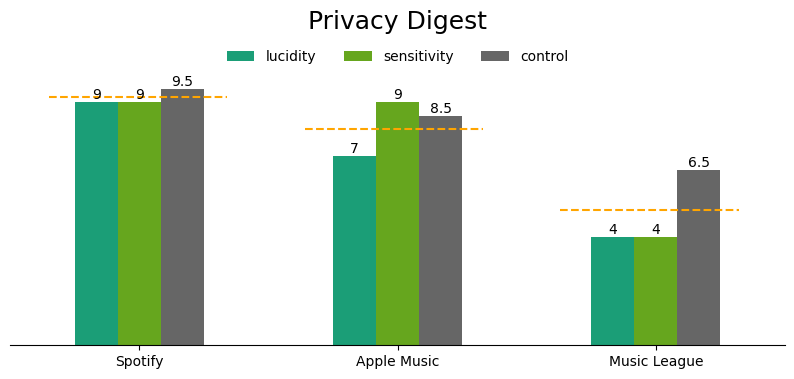

In [6]:
# Bar chart: scans by type by year
yrange = (0, evals_df.to_numpy().max()*1.2)
bar_chart = evals_df[:3].T.plot.bar(
    cmap='Dark2',
    ylim=yrange,
    rot=0,
    figsize=(10, 4))

# Set title and legend location
plt.title('Privacy Digest', fontsize=18)
plt.legend(loc='upper center', ncol=len(evals_df.columns), frameon=False)

# Add data labels per bar
for container in bar_chart.containers:
    bar_chart.bar_label(container)

# import matplotlib.pyplot as plt
xrange_iter = [0.05, 0.28]
for overall in evals_df.iloc[3]:
    plt.axhline(y=overall, color='orange', linestyle='dashed', xmin=xrange_iter[0], xmax=xrange_iter[1])
    xrange_iter[0] += 0.33
    xrange_iter[1] += 0.33

# Hide borders and y-axis ticks
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.yticks(ticks=[])
plt.show()

In [5]:
# Evaluation details
eval_details = {
    'spotify':
        {
            'lucidity': 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc vitae dapibus purus, ac dictum ipsum.',
            'lexicon': 'Vestibulum tristique facilisis porta. Donec ullamcorper feugiat lectus, sit amet efficitur elit blandit ullamcorper.',
            'sensitivity': 'Ut vel gravida ex. Suspendisse nisl felis, commodo sit amet sodales non, posuere ac odio.',
        },
    'apple_music':
        {
            'lucidity': 'Ut vel gravida ex. Suspendisse nisl felis, commodo sit amet sodales non, posuere ac odio.',
            'lexicon': 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc vitae dapibus purus, ac dictum ipsum.',
            'sensitivity': 'Vestibulum tristique facilisis porta. Donec ullamcorper feugiat lectus, sit amet efficitur elit blandit ullamcorper.',
        },
    'music_league':
        {
            'lucidity': 'Ut vel gravida ex. Suspendisse nisl felis, commodo sit amet sodales non, posuere ac odio.',
            'lexicon': 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc vitae dapibus purus, ac dictum ipsum.',
            'sensitivity': 'Vestibulum tristique facilisis porta. Donec ullamcorper feugiat lectus, sit amet efficitur elit blandit ullamcorper.',
        },
}

{'may': 29,
 'any': 20,
 'some': 13,
 'option': 11,
 'might': 5,
 'depend': 3,
 'possib': 3,
 'someone': 3,
 'question': 3,
 'anyone': 3,
 'bet': 2,
 'generally': 2,
 'depends': 2,
 'occasional': 1,
 'typically': 1,
 'vary': 1,
 'unresolv': 1,
 'depending': 1}

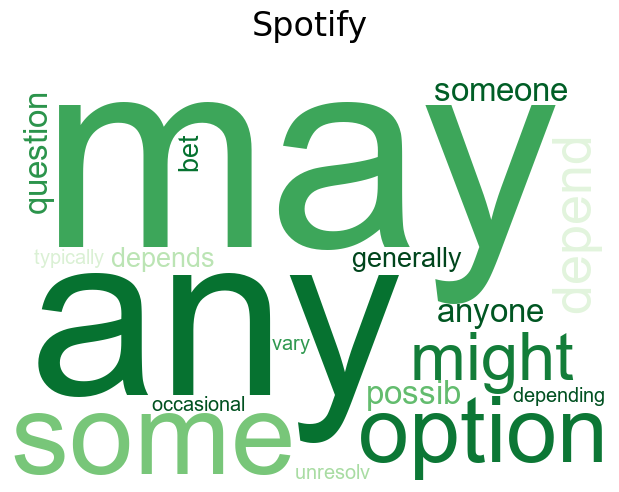

In [48]:
# Word clouds

comment_words = ''
stopwords = set(STOPWORDS)

# Get keywords that matched "Tentat" and "Certain" LIWC
site = 'Spotify' # Spotify, Apple Music, MusicLeague
with open(f'../scores/vague_{site}.json') as f:
    site_vagueness = json.load(f)
freq = {token: site_vagueness['Tentat']['kw'].count(token) for token in set(site_vagueness['Tentat']['kw'])}
freq = dict(sorted(freq.items(), key=lambda x:x[1], reverse=True))

# Create WordCloud objects with fit_words() method
wordcloud = WordCloud(
    font_path='arial',
    width=600,
    height=400,
    background_color='white',
    colormap='Greens',
    stopwords=stopwords,
    min_font_size=8,
    ).fit_words(freq)
# Spotify > 'Greens'
# Apple > 'Reds'
# MusicLeague > 'Purples'

# Plot the WordCloud images
plt.figure(figsize=(6, 4), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(f"{site}\n", fontsize=24)

plt.show()
